In [1]:
# data files path: ./data/

In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from feature_extractor import *
from cluster_events import *
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import RandomForest as rf
import KNN as knn
from sklearn.metrics import accuracy_score, fbeta_score
from sklearn.naive_bayes import GaussianNB
import GaussianNaiveBayes as gnb
import neaural_net as nn
import logisitic_regression as log_reg
import dummy_classifier as dumm
import svm as svm
import EnsembleLearning as el

In [20]:
dataPath = './data/'
outputPath = './results/'

In [4]:
users = pd.read_csv(dataPath + "users.csv")
users.head()

,user_id,locale,birthyear,gender,joinedAt,location,timezone
0,3197468391,id_ID,1993,male,2012-10-02T06:40:55.524Z,Medan Indonesia,480.0
1,3537982273,id_ID,1992,male,2012-09-29T18:03:12.111Z,Medan Indonesia,420.0
2,823183725,en_US,1975,male,2012-10-06T03:14:07.149Z,Stratford Ontario,-240.0
3,1872223848,en_US,1991,female,2012-11-04T08:59:43.783Z,Tehran Iran,210.0
4,3429017717,id_ID,1995,female,2012-09-10T16:06:53.132Z,NaN,420.0


In [5]:
# set max display col
# pd.set_option('display.max_colwidth', -1)
# pd.reset_option('display.max_colwidth')
user_friends = pd.read_csv(dataPath + "user_friends.csv")
user_friends.head()

,user,friends
0,3197468391,1346449342 3873244116 4226080662 1222907620 54...
1,3537982273,1491560444 395798035 2036380346 899375619 3534...
2,823183725,1484954627 1950387873 1652977611 4185960823 42...
3,1872223848,83361640 723814682 557944478 1724049724 253059...
4,3429017717,4253303705 2130310957 1838389374 3928735761 71...


In [37]:
events = pd.read_csv(dataPath + 'events.csv')
events.head()

,event_id,user_id,start_time,city,state,zip,country,lat,lng,c_1,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
0,684921758,3647864012,2012-10-31T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0,1,0,0,0,0,0,0,0,9
1,244999119,3476440521,2012-11-03T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0,0,0,0,0,0,0,0,0,7
2,3928440935,517514445,2012-11-05T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,12
3,2582345152,781585781,2012-10-30T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,8
4,1051165850,1016098580,2012-09-27T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,9


In [7]:
train_data = pd.read_csv(dataPath + 'train.csv')
train_data.head()

,user,event,invited,timestamp,interested,not_interested
0,3044012,1918771225,0,2012-10-02 15:53:05.754000+00:00,0,0
1,3044012,1502284248,0,2012-10-02 15:53:05.754000+00:00,0,0
2,3044012,2529072432,0,2012-10-02 15:53:05.754000+00:00,1,0
3,3044012,3072478280,0,2012-10-02 15:53:05.754000+00:00,0,0
4,3044012,1390707377,0,2012-10-02 15:53:05.754000+00:00,0,0


In [8]:
# gender and dob
# check for nulls
# users['birthyear'].isna().values.any()
# 'None' in users['birthyear'].unique()
# train_data['gender'].unique()

#     return merged_df2

train_data = add_gender_age(train_data, users)
train_data = add_location_features(train_data, events, users)
train_data = add_event_creator_friend_timestamp_feature(train_data, events, user_friends)
train_data.head()

,timestamp,interested,not_interested,event,same_city,same_country,user,event_id,creator_id,start_time,is_creator_friend,not_start_diff
0,2012-10-30 01:48:25.617000+00:00,0,0,2352676247,False,False,4236494,2352676247,2939696577,2012-11-04T00:00:00.001Z,False,-425495.0
1,2012-10-30 01:48:28.645000+00:00,1,0,152418051,False,True,4236494,152418051,1618377432,2012-11-03T07:00:00.003Z,False,-364292.0
2,2012-11-01 08:23:07.912000+00:00,0,0,2352676247,False,False,244644122,2352676247,2939696577,2012-11-04T00:00:00.001Z,False,-229013.0
3,2012-11-01 08:23:07.912000+00:00,1,0,152418051,False,True,244644122,152418051,1618377432,2012-11-03T07:00:00.003Z,False,-167813.0
4,2012-11-01 08:23:07.912000+00:00,0,0,1859823732,False,False,244644122,1859823732,199568896,2012-11-04T00:00:00.001Z,False,-229013.0


In [35]:
event_attendees_data = pd.read_csv(dataPath + 'event_attendees.csv')
event_attendees_data.head()

,event,yes,maybe,invited,no
0,1159822043,1975964455 252302513 4226086795 3805886383 142...,2733420590 517546982 1350834692 532087573 5831...,1723091036 3795873583 4109144917 3560622906 31...,3575574655 1077296663
1,686467261,2394228942 2686116898 1056558062 3792942231 41...,1498184352 645689144 3770076778 331335845 4239...,1788073374 733302094 1830571649 676508092 7081...,NaN
2,1186208412,NaN,3320380166 3810793697,1379121209 440668682,1728988561 2950720854
3,2621578336,NaN,NaN,NaN,NaN
4,855842686,2406118796 3550897984 294255260 1125817077 109...,2671721559 1761448345 2356975806 2666669465 10...,1518670705 880919237 2326414227 2673818347 332...,3500235232


In [10]:
train_data = get_event_attendee_nums(train_data, event_attendees_data)
train_data.head()

,timestamp,interested,not_interested,event,same_city,same_country,user,event_id,creator_id,start_time,is_creator_friend,not_start_diff,yes,maybe,invited,no,f4,f5,f6
0,2012-10-30 01:48:25.617000+00:00,0,0,2352676247,False,False,4236494,2352676247,2939696577,2012-11-04T00:00:00.001Z,False,-425495.0,17,18,556,10,0.588235,1.058824,32.705882
1,2012-11-01 08:23:07.912000+00:00,0,0,2352676247,False,False,244644122,2352676247,2939696577,2012-11-04T00:00:00.001Z,False,-229013.0,17,18,556,10,0.588235,1.058824,32.705882
2,2012-11-02 17:53:30.607000+00:00,0,0,2352676247,False,False,912476748,2352676247,2939696577,2012-11-04T00:00:00.001Z,False,-108390.0,17,18,556,10,0.588235,1.058824,32.705882
3,2012-10-30 18:47:27.937000+00:00,0,0,2352676247,False,False,1666085128,2352676247,2939696577,2012-11-04T00:00:00.001Z,False,-364353.0,17,18,556,10,0.588235,1.058824,32.705882
4,2012-10-31 19:32:50.373000+00:00,0,0,2352676247,False,False,1804164018,2352676247,2939696577,2012-11-04T00:00:00.001Z,False,-275230.0,17,18,556,10,0.588235,1.058824,32.705882


In [12]:
# test_merge_df = pd.merge(train_data, user_friends, how='inner', left_on='user', right_on='user')
# test_merge_df.head()

In [11]:
train_data = get_friends_attendee_nums(train_data, user_friends, event_attendees_data)
train_data.head()

,timestamp,interested,not_interested,event,same_city,same_country,user,event_id,creator_id,start_time,...,invited,no,f4,f5,f6,friends,f7,f8,f9,f10
0,2012-10-30 01:48:25.617000+00:00,0,0,2352676247,False,False,4236494,2352676247,2939696577,2012-11-04T00:00:00.001Z,...,556,10,0.588235,1.058824,32.705882,596,0,1,1,30
1,2012-10-30 01:48:28.645000+00:00,1,0,152418051,False,True,4236494,152418051,1618377432,2012-11-03T07:00:00.003Z,...,5597,596,0.707838,0.959620,6.647268,596,5,1,6,36
2,2012-11-01 08:23:07.912000+00:00,0,0,2352676247,False,False,244644122,2352676247,2939696577,2012-11-04T00:00:00.001Z,...,556,10,0.588235,1.058824,32.705882,872,9,4,10,226
3,2012-11-01 08:23:07.912000+00:00,1,0,152418051,False,True,244644122,152418051,1618377432,2012-11-03T07:00:00.003Z,...,5597,596,0.707838,0.959620,6.647268,872,4,3,4,44
4,2012-11-01 08:23:07.912000+00:00,0,0,1859823732,False,False,244644122,1859823732,199568896,2012-11-04T00:00:00.001Z,...,267,9,0.692308,1.000000,20.538462,872,0,0,0,10


In [12]:
pd.set_option('display.max_columns', None)
train_data = get_friends_attendee_ratios(train_data)
train_data.head()

,timestamp,interested,not_interested,event,same_city,same_country,user,event_id,creator_id,start_time,is_creator_friend,not_start_diff,yes,maybe,invited,no,f4,f5,f6,friends,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18
0,2012-10-30 01:48:25.617000+00:00,0,0,2352676247,False,False,4236494,2352676247,2939696577,2012-11-04T00:00:00.001Z,False,-425495.0,17,18,556,10,0.588235,1.058824,32.705882,596,0,1,1,30,0.000000,0.000000,0.000000,0.000000,0.001678,0.001678,0.050336,0.017986
1,2012-10-30 01:48:28.645000+00:00,1,0,152418051,False,True,4236494,152418051,1618377432,2012-11-03T07:00:00.003Z,False,-364292.0,842,808,5597,596,0.707838,0.959620,6.647268,596,5,1,6,36,0.200000,1.200000,7.200000,0.008389,0.001678,0.010067,0.060403,0.106486
2,2012-11-01 08:23:07.912000+00:00,0,0,2352676247,False,False,244644122,2352676247,2939696577,2012-11-04T00:00:00.001Z,False,-229013.0,17,18,556,10,0.588235,1.058824,32.705882,872,9,4,10,226,0.444444,1.111111,25.111111,0.010321,0.004587,0.011468,0.259174,0.017986
3,2012-11-01 08:23:07.912000+00:00,1,0,152418051,False,True,244644122,152418051,1618377432,2012-11-03T07:00:00.003Z,False,-167813.0,842,808,5597,596,0.707838,0.959620,6.647268,872,4,3,4,44,0.750000,1.000000,11.000000,0.004587,0.003440,0.004587,0.050459,0.106486
4,2012-11-01 08:23:07.912000+00:00,0,0,1859823732,False,False,244644122,1859823732,199568896,2012-11-04T00:00:00.001Z,False,-229013.0,13,13,267,9,0.692308,1.000000,20.538462,872,0,0,0,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011468,0.033708


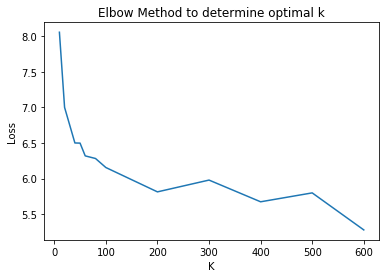

In [16]:
K = [10, 20, 40, 50, 60, 80, 100, 200, 300, 400, 500, 600]
loss = [8.0545744270306, 7.000246119336558, 6.500759436696417, 6.498793292784846, 6.319748048076176, 6.282755542893157,  6.1563728574075745, 5.814683235919998, 5.9800807168807415, 5.675408336909335, 5.800346960036805, 5.280742720821256]
import matplotlib.pyplot as plt
plt.plot(K, loss)
plt.xlabel('K')
plt.ylabel('Loss')
plt.title('Elbow Method to determine optimal k')
# plt.show()
plt.savefig(outputPath + 'elbow.png')

In [ ]:
# Get and save events clusters
k = 50 #50
event_clusters = get_clusters(events, k)
event_clusters.to_csv(dataPath + 'event_clusters_50.csv', na_rep = 'NA', header = True, index = False)

k = 200 #50
event_clusters = get_clusters(events, k)
event_clusters.to_csv(dataPath + 'event_clusters_200.csv', na_rep = 'NA', header = True, index = False)

In [18]:
(user_attendance_yes, user_attendance_maybe, user_attendance_no, user_attendance_invited) = get_user_attendance(event_attendees_data, events)

user_attendance_yes.to_csv(dataPath + 'user_attendance_yes.csv' , na_rep = 'NA', header = True, index = False)
user_attendance_maybe.to_csv(dataPath + 'user_attendance_maybe.csv' , na_rep = 'NA', header = True, index = False)
user_attendance_no.to_csv(dataPath + 'user_attendance_no.csv' , na_rep = 'NA', header = True, index = False)
user_attendance_invited.to_csv(dataPath + 'user_attendance_invited.csv' , na_rep = 'NA', header = True, index = False)

In [25]:
# load processed data
# PBM - list read as string

# event_clusters = pd.read_csv(dataPath + 'event_clusters_200.csv')
# user_attendance_yes = pd.read_csv(dataPath + 'user_attendance_yes.csv')
# user_attendance_maybe = pd.read_csv(dataPath + 'user_attendance_maybe.csv')
# user_attendance_no = pd.read_csv(dataPath + 'user_attendance_no.csv')
# user_attendance_invited = pd.read_csv(dataPath + 'user_attendance_invited.csv')

In [253]:
train_data = get_cluster_sim_by_user_attendance(train_data, event_clusters, user_attendance_yes, user_attendance_maybe, user_attendance_no, user_attendance_invited)
train_data.head()

,timestamp,interested,not_interested,event,same_city,same_country,user,event_id,creator_id,start_time,is_creator_friend,not_start_diff,yes,maybe,invited,no,f4,f5,f6,friends,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,sim_yes_cluster,sim_maybe_cluster,sim_no_cluster,sim_invited_cluster
0,2012-10-02 15:53:05.754000+00:00,0,0,1918771225,False,False,3044012,1918771225,4106419938,2012-10-03T08:00:00.002Z,False,-58015.0,83.0,20.0,249.0,269.0,3.240964,0.240964,3.000000,9269,0,3,0,3,0.0,0.0,0.0,0.000000,0.000324,0.0,0.000324,1.080321,NaN,NaN,NaN,NaN
1,2012-10-02 15:53:05.754000+00:00,0,0,1502284248,False,False,3044012,1502284248,2016654644,2012-10-03T11:00:00.003Z,False,-68815.0,106.0,63.0,1312.0,21.0,0.198113,0.594340,12.377358,9269,0,0,0,1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000108,0.016006,NaN,NaN,NaN,NaN
2,2012-10-02 15:53:05.754000+00:00,1,0,2529072432,False,False,3044012,2529072432,3639934255,2012-10-26T13:30:00.003Z,False,-2065015.0,2278.0,1648.0,41337.0,1476.0,0.647937,0.723442,18.146181,9269,0,0,0,2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000216,0.035707,NaN,NaN,NaN,NaN
3,2012-10-02 15:53:05.754000+00:00,0,0,3072478280,False,False,3044012,3072478280,97461525,2012-10-06T05:00:00.003Z,False,-306415.0,85.0,64.0,94.0,0.0,0.000000,0.752941,1.105882,9269,1,0,0,0,0.0,0.0,0.0,0.000108,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN
4,2012-10-02 15:53:05.754000+00:00,0,0,1390707377,False,False,3044012,1390707377,3639934255,2012-10-06T03:00:00.003Z,False,-299215.0,886.0,700.0,41020.0,590.0,0.665914,0.790068,46.297968,9269,0,0,0,2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000216,0.014383,NaN,NaN,NaN,NaN


In [309]:
train_data = get_cluster_sim_by_user_friends_attendance(train_data, event_clusters, user_friends, user_attendance_yes, user_attendance_maybe, user_attendance_no, user_attendance_invited)
# train_data.head()

In [310]:
train_data.head

<bound method NDFrame.head of                               timestamp  interested  not_interested  \
0      2012-10-02 15:53:05.754000+00:00           0               0   
1      2012-10-02 15:53:05.754000+00:00           0               0   
2      2012-10-02 15:53:05.754000+00:00           1               0   
3      2012-10-02 15:53:05.754000+00:00           0               0   
4      2012-10-02 15:53:05.754000+00:00           0               0   
...                                 ...         ...             ...   
15393  2012-12-08 03:59:43.169000+00:00           0               0   
15394  2012-12-08 03:59:43.169000+00:00           0               0   
15395  2012-12-08 03:59:43.169000+00:00           0               0   
15396  2012-12-08 03:59:43.169000+00:00           0               0   
15397  2012-12-08 03:59:43.169000+00:00           1               0   

            event  same_city  same_country        user    event_id  \
0      1918771225      False         False     

In [39]:
train_data = get_sim_by_user_attendance(train_data, user_attendance_yes, user_attendance_maybe, event_attendees_data)
train_data.head()

,event,user,same_city,same_country,is_creator_friend,not_start_diff,yes,maybe,invited,no,...,sim_yes_cluster,sim_maybe_cluster,sim_no_cluster,sim_invited_cluster,sim_friends_yes_cluster,sim_friends_maybe_cluster,sim_friends_no_cluster,interested,event_att_yes_sim,event_att_maybe_sim
0,1918771225,3044012,False,False,False,-58015.0,83.0,20.0,249.0,269.0,...,19.045009,214.385683,53.446484,19.045009,38.239356,69.264661,40.280149,0,0.0,0.0
1,1502284248,3044012,False,False,False,-68815.0,106.0,63.0,1312.0,21.0,...,19.045009,214.385683,53.446484,19.045009,37.956518,57.653432,37.099581,0,0.0,0.0
2,2529072432,3044012,False,False,False,-2065015.0,2278.0,1648.0,41337.0,1476.0,...,19.045009,214.385683,53.446484,19.045009,43.301546,55.075750,40.263049,1,0.0,0.0
3,3072478280,3044012,False,False,False,-306415.0,85.0,64.0,94.0,0.0,...,19.045009,214.385683,53.446484,19.045009,51.376349,57.472911,49.568598,0,0.0,0.0
4,1390707377,3044012,False,False,False,-299215.0,886.0,700.0,41020.0,590.0,...,19.045009,214.385683,53.446484,19.045009,61.547985,61.175950,61.535527,0,0.0,0.0


In [40]:
train_data.shape

(15398, 36)

In [43]:
features = ['same_city',
       'same_country', 
       'is_creator_friend', 'not_start_diff', 'yes', 'maybe', 'invited', 'no',
       'f4', 'f5', 'f6', 'friends', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12',
       'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'sim_yes_cluster',
       'sim_maybe_cluster', 'sim_no_cluster', 'sim_invited_cluster',
       'sim_friends_yes_cluster', 'sim_friends_maybe_cluster',
       'sim_friends_no_cluster', 'event_att_yes_sim', 'event_att_maybe_sim', 'interested']
train_data_ids = train_data[['event', 'user']]
train_data = train_data[features]

In [335]:
train_data = train_data.ffill().bfill()

In [339]:
train_data.to_csv(dataPath + 'processed_train.csv', na_rep = 'NA', header = True, index = False)
train_data_ids.to_csv(dataPath + 'train_ids.csv', na_rep = 'NA', header = True, index = False)

In [24]:
# train_data = pd.read_csv(dataPath + 'processed_train.csv')
# train_ids = pd.read_csv(dataPath + 'train_ids.csv')

In [ ]:
##########################################################

In [47]:
y = train_data['interested']
X = train_data.drop('interested', 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99, stratify = y)

In [50]:
X_train.to_csv(dataPath + 'X_train.csv', na_rep = 'NA', header = True, index = False)
X_test.to_csv(dataPath + 'X_test.csv', na_rep = 'NA', header = True, index = False)
y_train.to_csv(dataPath + 'y_train.csv', na_rep = 'NA', header = True, index = False)
y_test.to_csv(dataPath + 'y_test.csv', na_rep = 'NA', header = True, index = False)

In [4]:
# X_train = pd.read_csv(dataPath + 'X_train.csv')
# X_test = pd.read_csv(dataPath + 'X_test.csv')
# y_train = pd.read_csv(dataPath + 'y_train.csv')
# y_test = pd.read_csv(dataPath + 'y_test.csv')

In [51]:
print("Baseline Metrics")
print("k folds f0.5")
dummy_model = dumm.fit(X_train, y_train)

Baseline Metrics
k folds f0.5
F0.5 Cross Validation Scores:  [0.31425311 0.31425311 0.31425311 0.31437268 0.31437268]


In [52]:
y_predicted = dumm.fit_predict(X_train, y_train, X_test, dummy_model)
print("accuracy")
print(accuracy_score(y_predicted, y_test))
print("f0.5")
print(fbeta_score(y_test, y_predicted, beta = 0.5))

accuracy
0.2681818181818182
f0.5
0.31416400425985086


In [144]:
# RANDOM FOREST f0.5
print("k folds f0.5")
rf_model = rf.fit(X_train, y_train.values.ravel())

k folds f0.5
[0.53276179 0.51104101 0.53582001 0.54468363 0.50963331]
avg kfold val f0.5 score 0.5267879497834025


In [145]:
y_predicted = rf.fit_predict(X_train, y_train.values.ravel(), X_test, rf_model)
print("accuracy")
print(accuracy_score(y_predicted, y_test))
print("f0.5")
print(fbeta_score(y_test, y_predicted, beta = 0.5))

training accuracy:  0.9082643286247768
training f0.5 score:  0.9058725531028738
accuracy
0.7756493506493507
f0.5
0.5389797882579404


In [157]:
cols = X_train.columns.to_numpy()
# cols
cols

array(['same_city', 'same_country', 'is_creator_friend', 'not_start_diff',
       'yes', 'maybe', 'invited', 'no', 'f4', 'f5', 'f6', 'friends', 'f7',
       'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17',
       'f18', 'sim_yes_cluster', 'sim_maybe_cluster', 'sim_no_cluster',
       'sim_invited_cluster', 'sim_friends_yes_cluster',
       'sim_friends_maybe_cluster', 'sim_friends_no_cluster',
       'event_att_yes_sim', 'event_att_maybe_sim'], dtype=object)

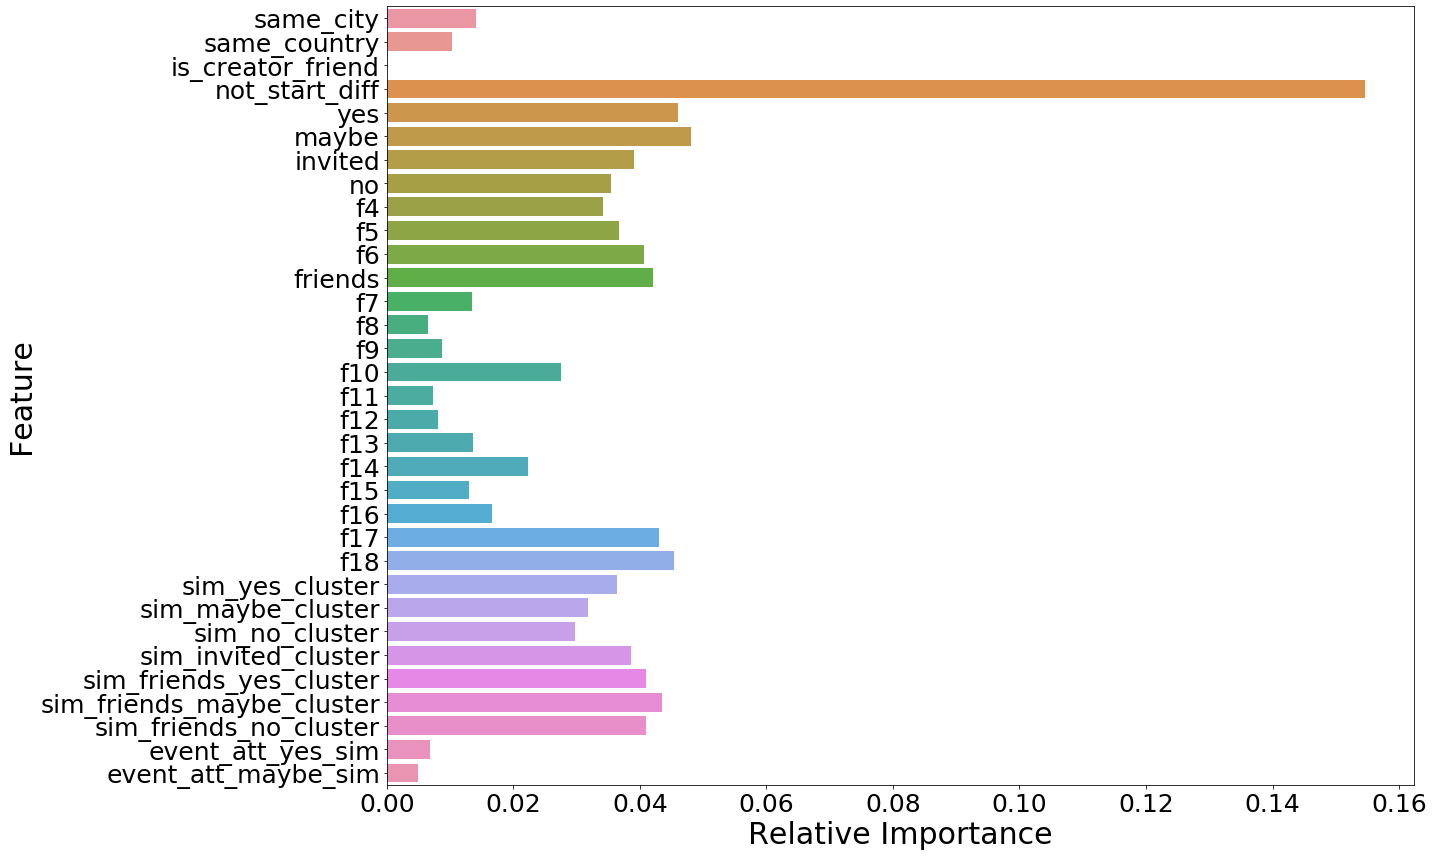

In [164]:
rf_imps = rf_model.feature_importances_
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12))
plt.xlabel('Relative Importance', fontsize=30)
plt.ylabel('Feature', fontsize=30)
sns.barplot(y = cols, x = rf_imps)
# plt.show()
plt.tick_params(labelsize=25)
plt.tight_layout()
plt.savefig(outputPath + 'rf_feat_imp.png')

In [146]:
#KNN f0.5
print("k fold f0.5")
knn_model = knn.fit(X_train, y_train)

k fold f0.5
[0.4674221  0.50677666 0.47484454 0.47365305 0.48185604]
avg kfold val f0.5 score 0.4809104786348842


In [147]:
y_predicted = knn.fit_predict(X_train, y_train, X_test, knn_model)
print("test accuracy")
print(accuracy_score(y_predicted, y_test))
print("test f0.5")
print(fbeta_score(y_test, y_predicted, beta = 0.5))

training accuracy:  1.0
training f0.5 score:  1.0
test accuracy
0.7665584415584416
test f0.5
0.5161854768153981


In [148]:
# GAUSSAIN NAIVE BAYES
print("k fold f0.5")
gnb_model = gnb.fit(X_train, y_train.values.ravel())

k fold f0.5
[0.2512385  0.2759135  0.24914676 0.20882585 0.24825446]
avg kfold val f0.5 score 0.24667581253227872


In [149]:
y_predicted = gnb.fit_predict(X_train, y_train.values.ravel(), X_test, gnb_model)
print("accuracy")
print(accuracy_score(y_predicted, y_test))
print("f0.5")
print(fbeta_score(y_test, y_predicted, beta = 0.5))

training accuracy:  0.7157006007468745
training f0.5 score:  0.24730547763177324
accuracy
0.7230519480519481
f0.5
0.27206771463119706


In [150]:
# SVM
print("k fold f0.5")
svm_model = svm.fit(X_train, y_train.values.ravel())

k fold f0.5


C:\Users\ramya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ramya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ramya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

[0.38746756 0.37163375 0.38393175 0.37129597 0.38849458]
avg kfold val f0.5 score 0.3805647206942905


In [151]:
y_predicted = svm.fit_predict(X_train, y_train.values.ravel(), X_test, svm_model)
print("accuracy")
print(accuracy_score(y_predicted, y_test))
print("f0.5")
print(fbeta_score(y_test, y_predicted, beta = 0.5))

C:\Users\ramya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


training accuracy:  0.9163825296314336
training f0.5 score:  0.902815064815525
accuracy
0.6983766233766234
f0.5
0.3951277480689246


In [152]:
# NEURAL NET
print("k fold f0.5")
neural_net_model = nn.fit(X_train, y_train.values.ravel())

k fold f0.5


C:\Users\ramya\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


F0.5 Cross Validation Scores:  [0.433213   0.36258661 0.43823889 0.40144339 0.4143044 ]
avg kfold val f0.5 score 0.4099572578611063


In [153]:
y_predicted = nn.fit_predict(X_train, y_train.values.ravel(), X_test, neural_net_model)
print("accuracy")
print(accuracy_score(y_predicted, y_test))
print("f0.5")
print(fbeta_score(y_test, y_predicted, beta = 0.5))

C:\Users\ramya\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


training accuracy:  0.798912161065108
training f0.5 score:  0.6253826642176157
accuracy
0.7321428571428571
f0.5
0.4554455445544554


In [154]:
# LOGISTIC REGRESSION
print("k fold f0.5")
log_reg_model = log_reg.fit(X_train, y_train)

k fold f0.5


C:\Users\ramya\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\ramya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ramya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ramya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver w

F0.5 Cross Validation Scores:  [0.21547502 0.18728717 0.18728717 0.16489988 0.19771072]
avg kfold val f0.5 score 0.19053199440696517


C:\Users\ramya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [155]:
y_predicted = log_reg.fit_predict(X_train, y_train.values.ravel(), X_test, log_reg_model)
print("accuracy")
print(accuracy_score(y_predicted, y_test))
print("f0.5")
print(fbeta_score(y_test, y_predicted, beta = 0.5))

training accuracy:  0.7352654651729177
training f0.5 score:  0.19471947194719472
accuracy
0.7357142857142858
f0.5
0.18850987432675045


C:\Users\ramya\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\ramya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [142]:
# ENSEMBLE
print("k fold f0.5")
estimators=[('rf', rf_model), ('knn', knn_model)] #, ('nn', neural_net_model)
weights = [0.9, 0.1]
el_model = el.fit(X_train, y_train, estimators, weights)

k fold f0.5
[0.53453453 0.50858233 0.55122828 0.52925707 0.51683402]
avg kfold val f0.5 score 0.5280872463740157


In [143]:
y_predicted = el.fit_predict(X_train, y_train, X_test, el_model)
print("accuracy")
print(accuracy_score(y_predicted, y_test))
print("f0.5")
print(fbeta_score(y_test, y_predicted, beta = 0.5))

training accuracy:  0.9118363370677058
training f0.5 score:  0.9106571498892444
accuracy
0.7818181818181819
f0.5
0.5642923219241444
